Brownian Motion and the Wiener Process
====================================


Igor Marfin    < <igor.marfin@unister.de>>



Abstract
----------------

-----------------

The financial statistics claims that Brownian motion can describe the random behaviour of the asset price level $S(t)$ over time. What is the Brownian motion then?

More details can be found at 



Initialization 
--------------------------

________


In [1]:
import sys
sys.path = ['/usr/local/lib/python2.7/dist-packages'] + sys.path # to fix the problem with numpy: this replaces  1.6 version by 1.9

%matplotlib inline
%pylab inline
ion()

import os
import matplotlib 
import numpy as np
import matplotlib.pyplot as pl
import matplotlib as mpl
import logging
import pymc as pm

# a plotter and dataframe modules
import seaborn as  sns # seaborn to make a nice plots of the data
import pandas as pd
import scipy.stats as stats


# Set up logging.
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# styling 1: comment it if you find it not good for you
import json
s = json.load( open("styles/my_matplotlibrc.json") )
matplotlib.rcParams.update(s)

from IPython.core.display import HTML
from IPython.display import display, Math, Latex
import urllib2


def css_styling():
    styles = open("styles/custom_v3.css", "r").read()
    return HTML(styles)
css_styling()

#HTML( urllib2.urlopen('http://bit.ly/1Bf5Hft').read() )

ion()

# styling 2: comment it if you find it not good for you

from book_format import load_style, figsize, set_figsize
load_style()




Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


The Markov  property of the Brownian motion
-----------------------------


-----------------

Definitely, the Brownian motion is the Markov chain of 'stochastic' states which do not have  'memory'. This means that the conditional probability distribution of the future states of the process are independent of any previous state, with the exception of the current state [[1]](#Markov)

$$\mathbb{P}(X_n=x_n|X_{n-1}=x_{n-1}, \dots, X_0=x_0)=\mathbb{P}(X_n=x_n|X_{n-1}=x_{n-1})$$


A sensible way to introduce the Markov property is through a sequence of random variables $Z_i$, which can take one of two values from the set {1,−1}. This is known as a coin toss. We can calculate the expectations of $Z_i$:
$$E(Z_i)=0,\,\,E(Z^2_i)=1,\,\,E(Z_iZ_k)=0.$$

The key point is that the expectation of $Z_i$ has no dependence on any previous values within the sequence. Let us take the partial sums of our random variables within our coin toss, which we will denote by Si:
$$S_i=\sum_{k=1}^i Z_k.$$

We can now calculate the expectations of our partial sums, using the linearity of the expectation operator:
$$E(S_i)=0,\,\,E(S^2_i)=E(Z^2_1+2*Z_1Z_2+...)=i.$$

We see that, again, there is no dependence on the expectation of $S_i$ of any previous value within the sequence of partial sums. The only thing  important here is that the variance of the partial sum is increasing linearly with the size $i$ of the partial chain.

We see that, again, there is no dependence on the expectation of $S_i$ of any previous value within the sequence of partial sums. We can extend this to discuss conditional expectation. Conditional expectation is the expectation of a random variable with respect to some conditional probability distribution. Hence, we can ask that if $i=4$ (i.e. we carry out four coin tosses), what does this mean for the expectation of $S_5$?

$$ E(S_5|Z_1,Z_2,Z_3,Z_4)=E(Z_5 + S_4|Z_1,Z_2,Z_3,Z_4) = E(Z_5) + E(S_4|Z_1,Z_2,Z_3,Z_4) = 0 + S_4 = S_4  $$

That is, the expected value of $S_i$ is only dependent upon the previous value $S_{i−1}$, not on any values prior to that. This is known as the Markov Property.


### Definition of the Brawnian Motion (BM)
---------------------

Consider a continuous real-valued time interval $[0,T], \, T>0$. In this interval $N$ coin tosses will be carried out, which each take a time $T/N$ and hence are spaced equally. Concurrently, the payoff returned from each coin toss will be modified. The sequence of discrete random variables representing the coin toss is $Z_i∈\{−1,1\}$.
A further sequence of discrete random variables (DRV), $\tilde{Z}_i∈\{\sqrt{T/N},-\sqrt{T/N}\}$, can be defined. The definition of such a sequence of DRVs is used to provide a very specific quadratic variation of the coin toss. 


The quadratic variation of a sequence of DRVs is defined to be simply the sum of the squared differences of the current and previous terms:

$$\sum_{k=1}^i (S_k - S_{k-1})^2.$$



For $Z_i$, the previous coin toss random variable sequence, the quadratic variation is given by:

$$\sum_{k=1}^i (S_k - S_{k-1})^2=i.$$

For $\tilde{Z}_i$, the quadratic variation of the partial sums $\tilde{S}_i$ is:

$$\sum_{k=1}^N (\tilde{S}_k - \tilde{S}_{k-1})^2= \sum_{k=1}^N \left(\sqrt{\frac{T}{N}}\right)^2 = T $$


Thus, by construction, the quadratic variation of the amended coin toss $\tilde{Z}_i$ is simply the total duration of all tosses, $T$.

Importantly, note that both the Markov properties are retained by $\tilde{Z}_i$. As 
$N\rightarrow \inf$ the random walk coin toss does not diverge. 



>**Definition:** A sequence of random variables $B(t)$ (a Markov chain) is a Brownian motion if $B(0)=0$, and for all $t,s$ such that $s<t, B(t)−B(s)$ is normally distributed with variance $t−s$ and the distribution of $B(t)−B(s)$ is independent of $B(r)$ for $r\leq s$. 


An example of the Brownian motion (Wiener Process) is given below.


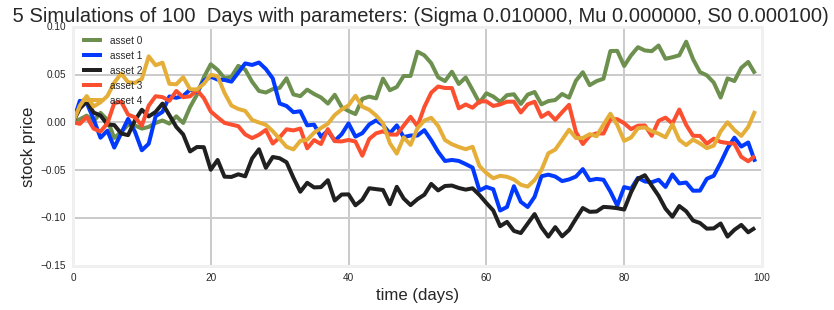

In [2]:
from numpy.random import standard_normal
from numpy import array, zeros, sqrt, shape
from pylab import *


def brownian(x_0=1e-9,T=100,dt=1e0, mu=0., sigma=1e-2, N_Sim=10,geometric=True):
    ''' generate the geometric brownian  motion (GBM) '''
    
    
    Steps=round(T/dt); #Steps in years
    S = zeros([N_Sim, Steps], dtype=float)
    x = range(0, int(Steps), 1)

    for j in range(0, N_Sim, 1):
        S[j,0]= x_0
        for i in x[:-1]:
            if (geometric):
                S[j,i+1]=S[j,i]+S[j,i]*(mu-0.5*pow(sigma,2))*dt+sigma*S[j,i]*sqrt(dt)*standard_normal();
            else:   
                S[j,i+1]=S[j,i]+ sigma*sqrt(dt)*standard_normal()
        plot(x, S[j],label='asset %i'%j)
    title(' %d Simulations of %d  Days with parameters: (Sigma %.6f, Mu %.6f, S0 %.6f)' % (int(N_Sim), int(Steps), sigma, mu, x_0))
    xlabel('time (days)')
    ylabel('stock price')
    legend(loc="upper left")
    show()    


sigma = 1e-2
mu=0.

brownian(x_0=1e-4,T=100.,dt=1e0, mu=mu, sigma=sigma, N_Sim=5,geometric=False)

In [91]:
%history -f brownian.py -l 1

File u'brownian.py' exists. Overwrite? y
Overwriting file.


The Brownian motion has a non-zero probability of being negative. This is clearly not a property shared by real-world assets - stock prices cannot be less than zero. Hence, although the stochastic nature of a Brownian motion for our model should be retained, it is necessary to adjust exactly how that randomness is distributed. 

In particular, the concept of geometric Brownian motion (GBM) can  be  introduced, which will solve the problem of negative stock prices.


Geometric Brownian motion (GBM)
-----------------------------


-----------------


>**Definition (Stochastic Differential Equation) :** 
Let $B(t)$ be a Brownian motion. If $W(t)$ is a sequence of random variables, such that for all t,
$$W(t+\delta t)−W(t)−\delta t \mu(t,W(t))−\sigma (t,B(t))(B(t+\delta t)−B(t))$$
is a random variable with mean and variance that are O(\delta t), then:
$$dW=\mu(t,W(t))dt+\sigma(t,W(t))dB$$
is a stochastic differential equation for the Geometric Brownian motion, W(t),or 
the Ito drift-diffusion process. 


It can be seen that $\mu$ and $\sigma$ are both functions of $t$ and $W$. $\mu$ has the interpretation of a non-stochastic drift coefficient, while $\sigma$ represents the coefficient of volatility - it is multiplied by the stochastic $dB$ term. 

The drift and  volatility functions are  simple scales 

$$ \mu(t,W(t)) = \mu\cdot W(t),\\ \sigma(t,W(t)) = \sigma\cdot W(t).$$


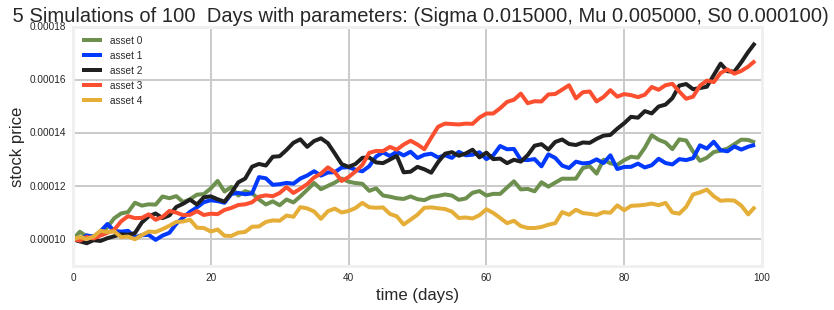

In [3]:
sigma = 1e-2
mu=0.

# we have changed geometric=False to geometric=True
#brownian(x_0=1e-4,T=100.,dt=1e0, mu=mu, sigma=sigma, N_Sim=5,geometric=True)

# we can add the trend ~ mu=50*x_0 and increase the volitality in 3/2 times
mu=.5e-2
sigma *=3./2. 
brownian(x_0=1e-4,T=100.,dt=1e0, mu=mu, sigma=sigma, N_Sim=5,geometric=True)

The main difference between GBM and BM is the 'trend' effect. Mathematicaly, this effect  is called **Mean Reversion**. 

Autoregressive Timeseries
----------------------

---------------------------


Ok. We have reached this point: why do people work with timeseries of price assets? 

>**Definition :**  Timeseries $X_t=\{x_t\}$ is an another representation of the Brownian Motion $$ X_t \equiv B(t) $$

All modeling the price assets will be done in the notation of $X_t=\{x_t\}$.
The **Mean Reverting** timeseries of continuous variable is given by an Ornstein-Uhlenbeck (Ornstein-Uhlenbeck Process) stochastic differential equation [[2]](#Uhlenbeck_process):

$$dx_t=\theta(\mu−x_t)dt+\sigma dW_t.$$ 

In the case of the discreete variables, as price assets, the **Mean Reverting** timeseries is modeled by the combination of Autoregressive and Moving-average models, which both together define the ARMA model ARMA(p,q) [[3]](#ARMA):


$$ X_t = c + \varepsilon_t + \sum_{i=1}^p \varphi_i X_{t-i} + \sum_{i=1}^q \theta_i \varepsilon_{t-i}.\, $$


$p$ and $q$ refer to the degrees of the  model:  p autoregressive terms and q moving-average terms.

References
----------------------

-------

<a id='Markov'></a>
[[1] Markov property](http://en.wikipedia.org/wiki/Markov_property)

<a id='Uhlenbeck_process'></a>
[[2] Ornstein–Uhlenbeck process](https://en.wikipedia.org/wiki/Ornstein%E2%80%93Uhlenbeck_process)


<a id='ARMA'></a>
[[3] Autoregressive–moving-average model](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model)
